<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1150px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">⭐ EDA - Exploratory Data Analysis - Sentiment Analysis </h2>

--- 

```

1️⃣ Descriptive Statistics - ✅
2️⃣ Correlation Analysis
3️⃣ Text Length Distribution / Data Distribution - ✅
4️⃣ Word Frequency Analysis - ✅
5️⃣ Sentiment Distribution
6️ Word Cloud Visualization
7️ Topic Modeling
8️ Token Distribution
9️⃣️ Class Imbalance Analysis - 100: Target - positive (80) & negative (20)
🔟 Pairwise Plotting
1️⃣1️⃣  Dimensionality Reduction

# Tasks
🔠 Most Common Words - Distribution
💬 Most Negative Common Words & Most Positive Common Words - ☁️ Word Cloud Visualization

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [27]:
def load_data(file_path):
    # Read CSV file
    df = pd.read_csv(
        file_path, 
        header=None, 
        encoding="latin-1",  # Change to "utf-8" if needed
        names=["target", "id", "date", "meta", "user", "text"]
    )
    
    # Convert Sentiment Target (0 = Negative, 4 = Positive)
    df['sentiment'] = df['target'].apply(lambda x: 'positive' if x == 4 else 'negative')
    df.drop(columns =["id", "date", "meta", "user"], inplace=True)
    return df 

# Define file path
file_path = '/kaggle/input/sentiment140-dataset-with-1-6-million-tweets/training.1600000.processed.noemoticon.csv'

# Load data
df = load_data(file_path)

In [28]:
# checking dataset balance or imbalance.
num_pos = len(df[df['sentiment'] == 'positive'])
num_negative = len(df[df['sentiment'] == 'negative'])

print(num_pos, num_negative)

800000 800000


In [29]:
avg_length = df['text'].apply(lambda x: len(x.split())).mean()
print(avg_length)

13.176150625


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

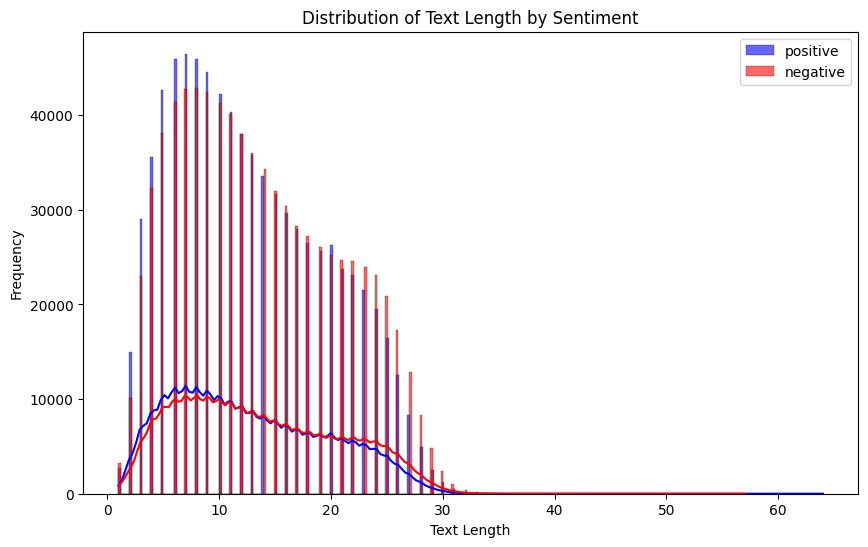

In [31]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))


plt.figure(figsize=(10,6))

sns.histplot(df[df['sentiment'] == 'positive']['text_length'], 
             kde=True, color='blue', label='positive', alpha=0.6)

sns.histplot(df[df['sentiment'] == 'negative']['text_length'], 
             kde=True, color='red', label='negative', alpha=0.6)

plt.legend()
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length by Sentiment")
plt.show()

In [32]:
df.head()

target                                               text sentiment  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  negative   
1       0  is upset that he can't update his Facebook by ...  negative   
2       0  @Kenichan I dived many times for the ball. Man...  negative   
3       0    my whole body feels itchy and like its on fire   negative   
4       0  @nationwideclass no, it's not behaving at all....  negative   

   text_length  
0           19  
1           21  
2           18  
3           10  
4           21

In [33]:
df.shape

(1600000, 4)

In [34]:
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [35]:
# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply Cleaning to Text
df["clean_text"] = df["text"].apply(clean_text)

# Separate Positive & Negative Texts
positive_texts = " ".join(df[df["sentiment"] == "positive"]["clean_text"])
negative_texts = " ".join(df[df["sentiment"] == "negative"]["clean_text"])

# Count Word Frequencies
positive_words = Counter(positive_texts.split()).most_common(20)  # Top 20
negative_words = Counter(negative_texts.split()).most_common(20)  # Top 20

# Convert to DataFrame for Plotting
positive_df = pd.DataFrame(positive_words, columns=["Word", "Frequency"])
negative_df = pd.DataFrame(negative_words, columns=["Word", "Frequency"])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


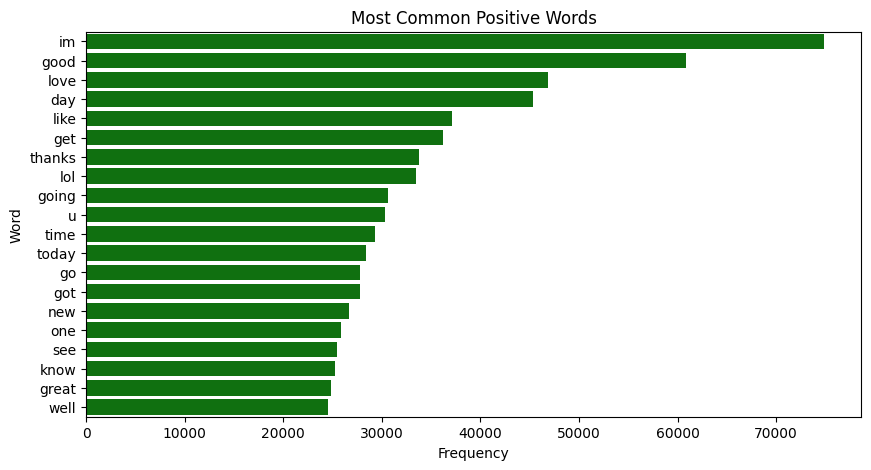

In [36]:
# Plot Most Common Words (Positive)
plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=positive_df, color="green")
plt.title("Most Common Positive Words")
plt.show()

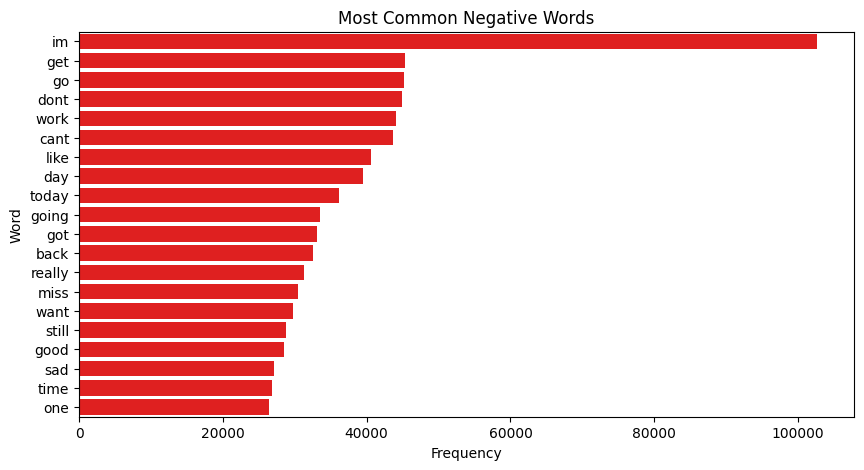

In [37]:
# Plot Most Common Words (Negative)
plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=negative_df, color="red")
plt.title("Most Common Negative Words")
plt.show()

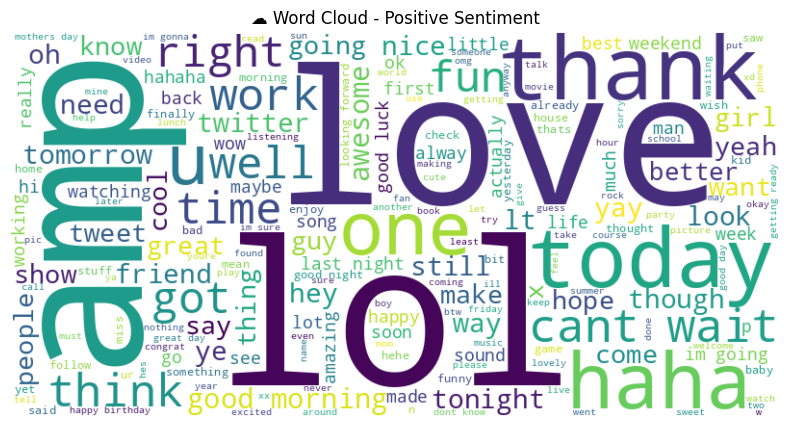

In [38]:
# Generate Word Clouds ☁️
plt.figure(figsize=(10,5))
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_texts)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("☁️ Word Cloud - Positive Sentiment")
plt.show()

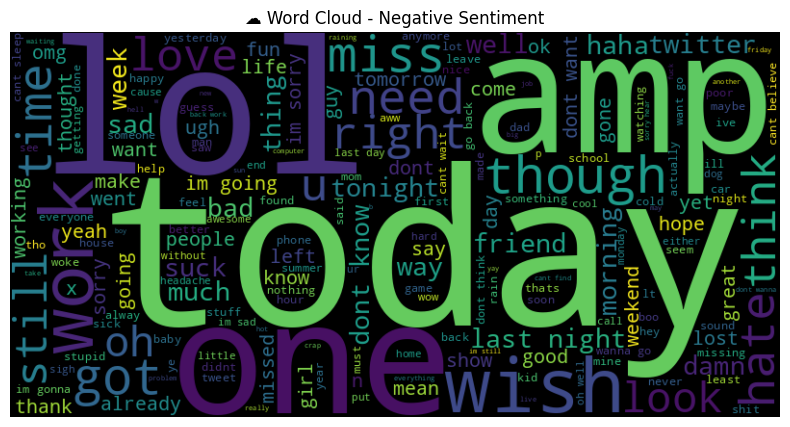

In [39]:
plt.figure(figsize=(10,5))
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_texts)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("☁️ Word Cloud - Negative Sentiment")
plt.show()

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords

# Standard English stopwords set
standard_stopwords = set(stopwords.words('english'))

# Print the standard stopwords
print("Standard Stopwords:")
print(sorted(standard_stopwords))  # Sorted for better readability

Standard Stopwords:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 's

In [42]:
from nltk.corpus import stopwords

# Standard English stopwords set
standard_stopwords = set(stopwords.words('english'))

# Print the standard stopwords
print("Standard Stopwords:")
print(len(sorted(standard_stopwords)))  # Sorted for better readability

Standard Stopwords:
198


In [43]:
# How to add custom stopwords to the existing nltk stopwords.

In [44]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def clean_prep_text(text):
    # Convert to lowercase
    text = text.lower()
    print("Lowercase: ", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    print("Remove Punctuation: ", text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    print("Remove Stopwords: ", text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a cleaned sentence
    return ' '.join(tokens)

In [ ]:
# # Apply the cleaning function to a DataFrame column
df['cleaned_text'] = df['text'].apply(clean_prep_text)

# Dataset thakay terget and clean text bar korbo 
#xs = df['cleaned_text'].tolist()  # List of input texts
#ys = df['sentiment'].tolist()     # List of labels

print("Cleaned Text:\n", len(df['cleaned_text']))

Lowercase:  @switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d
Remove Punctuation:  switchfoot httptwitpiccom2y1zl  awww thats a bummer  you shoulda got david carr of third day to do it d
Remove Stopwords:  switchfoot httptwitpiccom2y1zl  awww thats a bummer  you shoulda got david carr of third day to do it d
Lowercase:  is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!
Remove Punctuation:  is upset that he cant update his facebook by texting it and might cry as a result  school today also blah
Remove Stopwords:  is upset that he cant update his facebook by texting it and might cry as a result  school today also blah
Lowercase:  @kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds
Remove Punctuation:  kenichan i dived many times for the ball managed to save 50  the rest go out of bounds
Remove Stopwords:  kenichan i dived ma

In [ ]:
df['cleaned_text']

In [ ]:
from sklearn.model_selection import train_test_split
xs = df_subset['cleaned_text'].tolist()  # List of input texts
ys = df_subset['target'].tolist()        # List of labels

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state=0)

# Optionally, print the shapes of the resulting datasets
print(f'X_train shape: {len(X_train)}, y_train shape: {len(y_train)}')
print(f'X_test shape: {len(X_test)}, y_test shape: {len(y_test)}')

In [ ]:
xs = df_subset['cleaned_text'].tolist()  # List of input texts
ys = df_subset['target'].tolist()        # List of labels

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state=1)

print(X_train, y_train)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state=0)

print(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state=42)

print(X_train, y_train)

- We have a total of 10 documents.  These are split into two sets:
  
    - Training Set: 7 documents
    - Testing Set: 3 documents
Each document is represented by 130 features.

## TF-IDF

In [ ]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Sample training and testing datasets (replace these with your actual datasets)
Xtrain = ["This is a sample sentence", "Machine learning is fascinating", "I love programming in Python"]
Xtest = ["Python programming is fun", "Learning new things is exciting"]

# Creating a TfidfVectorizer with specified parameters
tfidf = TfidfVectorizer(ngram_range=(1, 3), use_idf=True, tokenizer=lambda x: x.split())

# Transforming the training data into TF-IDF matrix
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)

# Transforming the test data into TF-IDF matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)

- ngram_range=(1, 3) considers unigrams, bigrams, and trigrams.
- use_idf=True enables inverse document frequency weighting.
- The tokenizer=lambda x: x.split() splits the text into words based on spaces.

In [ ]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample training and testing datasets (replace these with your actual datasets)
Xtrain = ["This is a sample sentence", "Machine learning is fascinating", "I love programming in Python"]
Xtest = ["Python programming is fun", "Learning new things is exciting"]

# Creating a TfidfVectorizer with specified parameters
tfidf = TfidfVectorizer(ngram_range=(1, 3), use_idf=True, tokenizer=lambda x: x.split())

# Transforming the training data into a TF-IDF matrix
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)

# Transforming the test data into a TF-IDF matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)

# Mode Building

যেহেতু আমরা সেন্টিমেন্ট ক্লাসিফিকেশন করতেছি মানে আমার সেন্টিমেন্ট টা ভালো না খারাপ সেটা আমরা ক্লাসিফিকেশন করব সো এটার পারস্পেক্টিভেট ট্রেডিশনাল মেশিন লার্নিং এর চেয়ে মডেল গুলা ব্যবহার করা হয় ও গুলা সম্পর্কে একটু ভালোভাবে আমরা এক্সপ্লোর করব

🔍 What is Naïve Bayes Classifier?
```
🔹 Naïve Bayes Classifier একটি supervised learning algorithm, যা Bayes' theorem এর উপর ভিত্তি করে কাজ করে। এটি প্রতিটি বৈশিষ্ট্যকে স্বাধীন হিসেবে বিবেচনা করে এবং প্রতিটি শ্রেণীর সাথে সম্পর্কিত Probability এর ভিত্তিতে data classification করে। সর্বোচ্চ probability সম্পন্ন class কে চূড়ান্ত class হিসেবে বেছে নেওয়া হয়।

🔹 Naïve Bayes Classifier একটি supervised learning algorithm, যা Bayes' Theorem এর ভিত্তিতে কাজ করে। এখানে "Naïve" শব্দটি বোঝায় যে প্রতিটি ফিচার একে অপরের থেকে independent, অর্থাৎ একটি ফিচারের উপস্থিতি বা অনুপস্থিতি অন্য কোনো ফিচারের উপর নির্ভর করে না।

🔹 Bayes বলতে বোঝানো হয় Thomas Bayes নামে একজন বিজ্ঞানী, যিনি একটি উপপাদ্য প্রস্তাব করেছিলেন। এই উপপাদ্য অনুযায়ী, কোনো ঘটনার সম্ভাবনা নির্ভর করে পূর্বে ঘটে যাওয়া অন্য কোনো ঘটনার উপর।

🔹 Naïve Bayes Classifier-এ প্রতিটি ফিচারের probabilistic value হিসাব করা হয় এবং সেই মানগুলোর ভিত্তিতে classification করা হয়। যেমন, কোনো ইমেল স্প্যাম কিনা তা নির্ধারণ করতে, ইমেলের ফিচারগুলোর (যেমন: শব্দ) সম্ভাবনা বিবেচনা করে চূড়ান্ত সিদ্ধান্ত নেওয়া হয়।

🔹 সুতরাং, Naïve Bayes Classifier হলো এমন একটি পদ্ধতি, যা স্বাধীন ফিচারের সম্ভাবনা বিশ্লেষণ করে Bayes' Theorem এর সাহায্যে দ্রুত ও নির্ভুলভাবে মাধ্যমে ক্লাসিফিকেশন করাকে Naïve Bayes Classifier বলে। 😊

⚙ Key Features:
🔹 Fast and Efficient
🔹 Probabilistic Classifier
🔹 Assumption of Independence

📊 Applications:
🔹 Spam detection in emails
🔹 Sentiment analysis
🔹 Document classification
🔹 Medical diagnosis

### 🌟 **Bayes' Theorem**

Bayes' theorem হলো একটি গাণিতিক সূত্র, যা কোনো ঘটনা সংঘটিত হওয়ার  **শর্তাধীন সম্ভাবনা** নির্ধারণ করে, যদি অন্য একটি সম্পর্কিত ঘটনা ইতিমধ্যেই ঘটে থাকে। 


$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$

**যেখানে:**  
- \(P(A|B)\): **Posterior Probability** - B ঘটার পরে A ঘটার সম্ভাবনা  
- \(P(B|A)\): **Likelihood** - A ঘটার পরে B ঘটার সম্ভাবনা  
- \(P(A)\): **Prior Probability** - A ঘটার প্রাথমিক সম্ভাবনা  
- \(P(B)\): **Marginal Probability** - B ঘটার মোট সম্ভাবনা

## Bayes' Theorem এর ভিত্তিতে Prior vs Likelihood:

1. Prior Probability:
Prior হলো কোনো ঘটনার পূর্বাভাসিত সম্ভাবনা, যেখানে আমরা কোনো প্রমাণ বা তথ্য পাওয়ার আগেই সেই ঘটনার সম্ভাবনা নির্ধারণ করি।

এখানে 100টি টেক্সট ডকুমেন্ট আছে, যার মধ্যে:
- 60টি Positive
- 40টি Negative



2. Likelihood:
Likelihood হলো প্রদত্ত ডেটার ভিত্তিতে কোনো ক্লাসের সম্ভাবনা। উদাহরণস্বরূপ, যদি একটি টেক্সটে "Happy" শব্দটি থাকে, তবে সেই টেক্সট Positive নাকি Negative হওয়ার সম্ভাবনা।

Positive Comments:
    - Happy: ৩০ বার
    - Exited: ২৫ বার
    - মোট Positive Sentence: ৬০

Negative Comments:
    - Happy: ৫ বার
    - Exited: ১০ বার
    - মোট Negative Sentence: ৪০

### 📊 **Bayes' Theorem এর ভিত্তিতে Sentiment Analysis**

---

### 1. **Positive Sentiment এর জন্য Likelihood:**
এখানে **"Happy"** এবং **"Exited"** শব্দগুলো Positive ক্লাসে আসার সম্ভাবনা বের করা হয়েছে:

- **P(Happy | Positive):**
$$
P(Happy | 60 \text{ Positives}) = \frac{30+1}{60+3} = \frac{31}{63} = 0.49
$$

- **P(Exited | Positive):**
$$
P(Exited | 60 \text{ Positives}) = \frac{25+1}{63} = \frac{26}{63} = 0.41
$$

---

### 2. **Negative Sentiment এর জন্য Likelihood:**
এবার **"Happy"** এবং **"Exited"** শব্দগুলোর Negative ক্লাসে আসার সম্ভাবনা বের করা হয়েছে:

- **P(Happy | Negative):**
$$
P(Happy | 40 \text{ Negatives}) = \frac{5+1}{40+3} = \frac{6}{43} = 0.13
$$

- **P(Exited | Negative):**
$$
P(Exited | 40 \text{ Negatives}) = \frac{10+1}{43} = \frac{11}{43} = 0.25
$$

---

## 🌟 **Posterior Probabilities:**

---

### 🔹 1. **Positive Sentiment এর জন্য:**
Posterior Probability এর সূত্র অনুযায়ী, Positive ক্লাসের সম্ভাবনা বের করা হয়েছে:

$$
P(\text{Positive}|X) = P(\text{Happy} | \text{Positive}) \times P(\text{Exited} | \text{Positive}) \times P(\text{Positive})
$$

মানগুলো বসালে:

$$
P(\text{Positive}|X) = 0.6 \times 0.49 \times 0.41 = 0.12
$$

---

### 🔹 2. **Negative Sentiment এর জন্য:**
একইভাবে, Negative ক্লাসের সম্ভাবনা নির্ণয় করা হয়েছে:

$$
P(\text{Negative}|X) = P(\text{Happy} | \text{Negative}) \times P(\text{Exited} | \text{Negative}) \times P(\text{Negative})
$$

মানগুলো বসালে:

$$
P(\text{Negative}|X) = 0.4 \times 0.13 \times 0.25 = 0.013
$$

---

### **✅ উপসংহার:**  
যেহেতু **P(Positive | X) = 0.12** এবং **P(Negative | X) = 0.013**, তাই **Positive** ক্লাসের সম্ভাবনা বেশি, অর্থাৎ এই টেক্সটটি **Positive Sentiment** হিসেবে শ্রেণীবদ্ধ করা হবে। 😊


---

### 3. **Prediction:**
যদি কোনো নতুন টেক্সটে **"Happy"** শব্দটি থাকে, তাহলে **Bayes' Theorem** এর ভিত্তিতে Positive বা Negative হওয়ার সম্ভাবনা বের করা হয়:

$$
P(\text{Positive} | \text{Happy}) = \frac{P(\text{Happy} | \text{Positive}) \times P(\text{Positive})}{P(\text{Happy})}
$$

---

**উপসংহার:**  
যেহেতু **P(Happy | Positive) = 0.49** এবং **P(Happy | Negative) = 0.13**, তাই **"Happy"** শব্দটি থাকলে সেই টেক্সটকে **Positive** হিসেবে শ্রেণীবদ্ধ করার সম্ভাবনা বেশি। ✅😊


3. Laplace Smoothing:
যখন কোনো শব্দের সংখ্যা শূন্য হতে পারে, তখন সম্ভাবনা শূন্য হওয়া রোধ করতে Laplace Smoothing ব্যবহার করা হয়।

Happy শব্দের Positive Class এর সম্ভাবনা:


এখানে:
- +1: Smoothing Factor
- +3: Vocabulary Size

## 📊 **Confusion Matrix and Classification Report**

---

### 🔹 **Confusion Matrix:**
Confusion matrix হলো একটি টেবিল, যা একটি ক্লাসিফিকেশন মডেলের **Actual (বাস্তব ফলাফল)** এবং **Predicted (ভবিষ্যদ্বাণীকৃত ফলাফল)** এর তুলনা করে মডেলের কার্যকারিতা বিশ্লেষণ করে।

| **Predicted \ Actual** | **Positive (Actual)** | **Negative (Actual)** |
|------------------------|------------------------|------------------------|
| **Positive (Predicted)**| True Positive (TP)     | False Positive (FP)    |
| **Negative (Predicted)**| False Negative (FN)    | True Negative (TN)     |

---

### ✏️ **Confusion Matrix এর Key Terms:**

1. **True Positive (TP):**  
   - **Actual Positive = Predicted Positive**  
   - সঠিকভাবে পজিটিভ ক্লাস ভবিষ্যদ্বাণী করা হয়েছে।  
   - *উদাহরণ:* আসলেই রোগী অসুস্থ ছিল, মডেলও অসুস্থ বলে সনাক্ত করেছে।

2. **False Positive (FP):**  
   - **Actual Negative = Predicted Positive**  
   - মডেল ভুলভাবে পজিটিভ হিসেবে ভবিষ্যদ্বাণী করেছে, যদিও আসল ফলাফল নেগেটিভ ছিল।  
   - *উদাহরণ:* সুস্থ রোগীকে অসুস্থ বলে সনাক্ত করা।

3. **True Negative (TN):**  
   - **Actual Negative = Predicted Negative**  
   - সঠিকভাবে নেগেটিভ ক্লাস ভবিষ্যদ্বাণী করা হয়েছে।  
   - *উদাহরণ:* রোগী সুস্থ ছিল, মডেলও সুস্থ বলে সনাক্ত করেছে।

4. **False Negative (FN):**  
   - **Actual Positive = Predicted Negative**  
   - মডেল ভুলভাবে নেগেটিভ হিসেবে ভবিষ্যদ্বাণী করেছে, যদিও আসল ফলাফল পজিটিভ ছিল।  
   - *উদাহরণ:* অসুস্থ রোগীকে সুস্থ বলে সনাক্ত করা।

---

## 📈 **Classification Report Metrics with Formulas**
Classification report **Precision**, **Recall**, **F1-Score**, এবং **Accuracy** প্রদর্শন করে।

---

### 🔹 **1. Accuracy Formula:** | মোট সঠিক ভবিষ্যদ্বাণীর হার  
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

### 🔹 **2. Precision Formula:** | পজিটিভ ভবিষ্যদ্বাণীর কত শতাংশ সঠিক ছিল   
$$
Precision = \frac{TP}{TP + FP}
$$

---

### 🔹 **3. Recall Formula:** | আসল পজিটিভের মধ্যে কতগুলো সঠিকভাবে সনাক্ত হয়েছে
$$
Recall = \frac{TP}{TP + FN}
$$

---

### 🔹 **4. F1-Score Formula:** | Precision এবং Recall এর ভারসাম্যপূর্ণ গড়  
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

---

### 🔹 **5. Posterior Probability for Negative:**
$$
P(\text{Negative}|X) = P(\text{Happy} | \text{Negative}) \times P(\text{Exited} | \text{Negative}) \times P(\text{Negative})
$$

---

---

### ✅ **Summary:**  
- **Accuracy:** সামগ্রিক সঠিকতার হার নির্ণয় করে।  
- **Precision:** পজিটিভ প্রেডিকশনের সঠিকতা জানায়।  
- **Recall:** পজিটিভ ক্লাস সনাক্ত করার দক্ষতা নির্দেশ করে।  
- **F1-Score:** Precision এবং Recall এর মধ্যে একটি সুষম মান দেয়।

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Create the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)

In [ ]:
# Predict the labels for the test set
y_pred = naive_bayes_classifier.predict(Xtest_tf)

# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Print confusion matrix
print(confusion_matrix(Ytest, y_pred))

# Print accuracy score
print(accuracy_score(Ytest, y_pred))

# Print classification report
print(classification_report(Ytest, y_pred))

In [ ]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(naive_bayes_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')

# Set axis labels and colors
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')

# Show plot
plt.show()

## Support Vector Machine (SVM), K-Nearest Neighbor (KNN), Logistic Regression, and Naive Bayes Classifier. 

In [ ]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

# Training and evaluating multiple classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine (SVM)": SVC(kernel='linear'),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train, predict, evaluate, and plot confusion matrices for each model
for name, model in classifiers.items():
    print(f"\n🚀 **{name} Classifier**")
    # Train the model
    model.fit(Xtrain_tf, Ytrain)
    # Predict the test set results
    y_pred = model.predict(Xtest_tf)
    
    # Evaluate the model
    print("\n📊 **Evaluation Metrics:**")
    print("Confusion Matrix:")
    print(confusion_matrix(Ytest, y_pred))
    
    print("\n✅ Accuracy Score:")
    print(accuracy_score(Ytest, y_pred))
    
    print("\n📄 Classification Report:")
    print(classification_report(Ytest, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plot_confusion_matrix(model, Xtest_tf, Ytest, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}', color='black')
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    plt.gcf().axes[0].tick_params(colors='black')
    plt.gcf().axes[1].tick_params(colors='black')
    plt.show()

print("\n🎯 Model evaluation completed for all classifiers!")